In [1]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#importing the dataset as a dataframe
x = pd.read_csv("bodyfat.csv")

In [3]:
x

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [4]:
#shape of the dataframe
x.shape

(252, 15)

In [5]:
x.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [6]:
#checking for NULL values
x.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [7]:
#checking for duplicate values
x.duplicated().sum()

0

<Axes: >

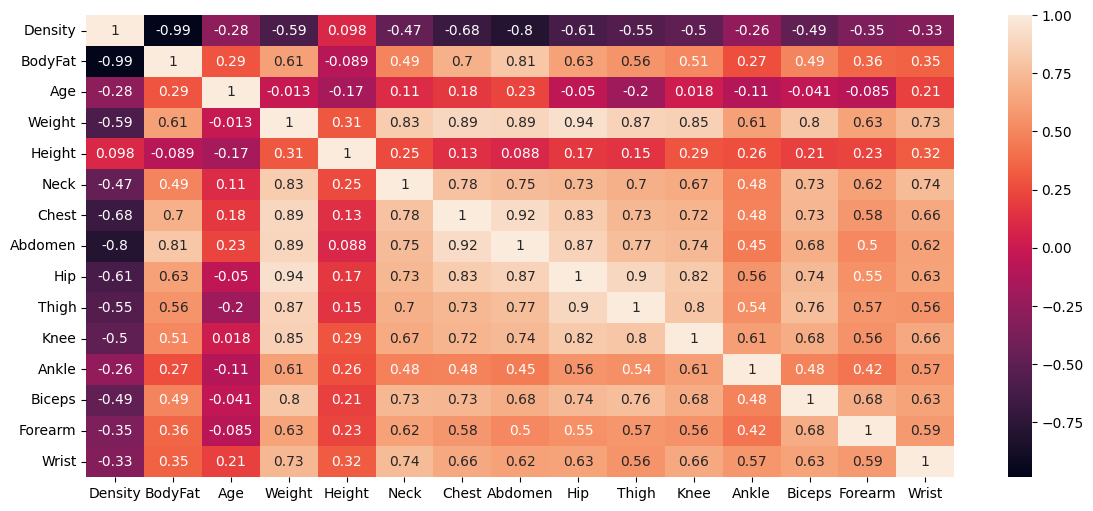

In [8]:
#plotting a heatMap to denote the correlation between the columns
plt.figure(figsize=(14,6))
sns.heatmap(x.corr(),annot=True)

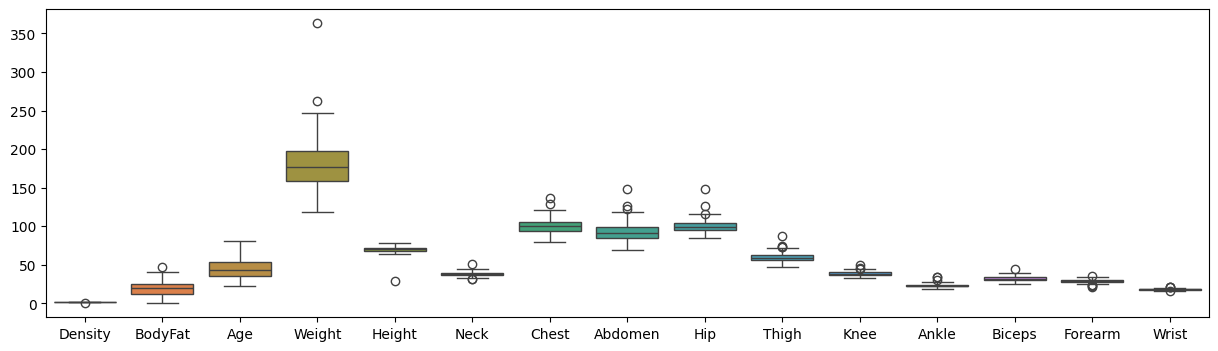

In [9]:
#plotting a box-plot to check for outliers
plt.figure(figsize=(15, 4))
sns.boxplot(data=x)
plt.show()

In [10]:
col = x.columns
col

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

In [11]:
#handling the "Outliers"

#something which is > Q3 + iqr and < Q1 - iqr is an outlier
for i in col:
    q1 = np.percentile(x[i], 25)
    q3 = np.percentile(x[i], 75)
    iqr = q3 - q1
    upperRange = q3 + iqr
    lowerRange = q1 - iqr

    #sorting the data based on the "outliers" condition
    x = x[(x[i] > lowerRange) & (x[i] < upperRange)]

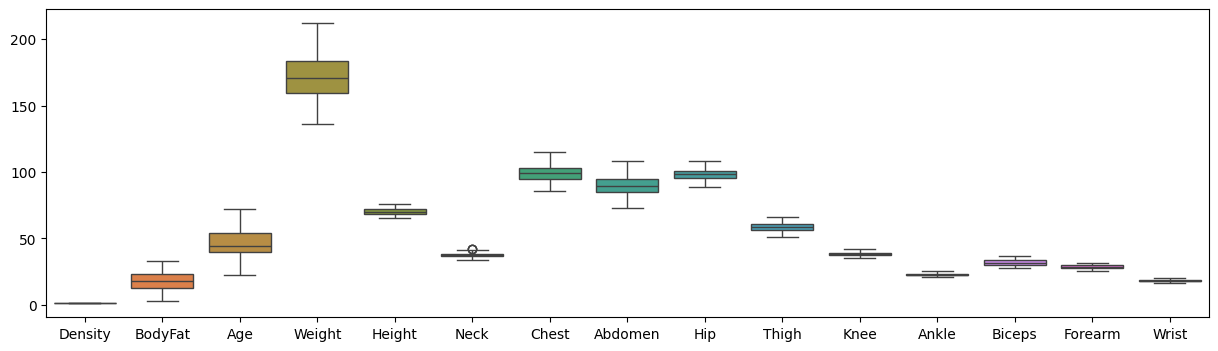

In [12]:
#plotting a box-plot to check for outliers, in the udpate dataframe
plt.figure(figsize=(15, 4))
sns.boxplot(data=x)
plt.show()

In [13]:
#pearson-correlation value on the "updated dataframe"
x.corr()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
Density,1.000000,-0.994379,-0.261763,-0.440409,0.135276,-0.278926,-0.523597,-0.738430,-0.455074,-0.380679,-0.289327,-0.053994,-0.355929,-0.215577,-0.062643
BodyFat,-0.994379,1.000000,0.269268,0.442914,-0.142882,0.288653,0.526787,0.739894,0.458984,0.386986,0.288695,0.058041,0.361161,0.221671,0.067201
Age,-0.261763,0.269268,1.000000,-0.040182,-0.266100,0.195948,0.221702,0.294042,-0.131651,-0.248402,0.008765,-0.155564,-0.033113,-0.039423,0.277347
Weight,-0.440409,0.442914,-0.040182,1.000000,0.491114,0.662796,0.795387,0.759296,0.856432,0.681930,0.699003,0.534635,0.648111,0.700209,0.556258
Height,0.135276,-0.142882,-0.266100,0.491114,1.000000,0.143530,0.096708,0.035694,0.341924,0.144042,0.378478,0.369432,0.103012,0.240333,0.266685
Neck,-0.278926,0.288653,0.195948,0.662796,0.143530,1.000000,0.609561,0.581763,0.513459,0.415569,0.444031,0.285516,0.544199,0.656992,0.620480
Chest,-0.523597,0.526787,0.221702,0.795387,0.096708,0.609561,1.000000,0.815965,0.626835,0.484473,0.506545,0.352101,0.602692,0.579476,0.496431
Abdomen,-0.738430,0.739894,0.294042,0.759296,0.035694,0.581763,0.815965,1.000000,0.707836,0.543047,0.519920,0.249567,0.502484,0.445274,0.395741
Hip,-0.455074,0.458984,-0.131651,0.856432,0.341924,0.513459,0.626835,0.707836,1.000000,0.798285,0.681555,0.427465,0.551813,0.553644,0.384535
Thigh,-0.380679,0.386986,-0.248402,0.681930,0.144042,0.415569,0.484473,0.543047,0.798285,1.000000,0.624180,0.401732,0.543695,0.527788,0.222086


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [15]:
#extracting features and target variable
features = x.iloc[:, [0] + list(range(2, x.shape[1]))].values #0th column and then 2nd column to the last (index)
y = x['BodyFat'].values  #1st column (index)

In [16]:
#normalizing the features to scale them between 0 and 1
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

In [17]:
#splitting the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(features, y, test_size=0.2, random_state=49)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=49)

In [18]:
#importing the tenserflow library
import tensorflow as tf

#importing keras and the layers
#keras is an API made on top of tensor flow, so that's why like this
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

2024-07-25 15:23:59.017496: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-25 15:23:59.044480: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-25 15:23:59.497810: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [19]:
#defining the model
model = Sequential()

#adding layers
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  #outputting layer with 1 neuron (predicting body fat)

2024-07-25 15:23:59.895124: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-25 15:23:59.911652: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-25 15:23:59.911815: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [20]:
#printing the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1920      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12289 (48.00 KB)
Trainable params: 12289 (48.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
#compiling the model
learning_rate = 0.1 
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='mse',
              metrics=tf.keras.metrics.RootMeanSquaredError())

In [22]:
#training the model with validation
epochs = 150
batch_size = 32
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/150


2024-07-25 15:24:01.067590: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1f87c580 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-07-25 15:24:01.067617: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2024-07-25 15:24:01.071566: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-25 15:24:01.166013: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2024-07-25 15:24:01.237883: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5/5 [==============================] - 1s 25ms/step - loss: 629.5917 - root_mean_squared_error: 25.0917 - val_loss: 472.9568 - val_root_mean_squared_error: 21.7476
Epoch 2/150
5/5 [==============================] - 0s 6ms/step - loss: 303.2281 - root_mean_squared_error: 17.4134 - val_loss: 130.6107 - val_root_mean_squared_error: 11.4285
Epoch 3/150
5/5 [==============================] - 0s 7ms/step - loss: 64.1692 - root_mean_squared_error: 8.0106 - val_loss: 79.6925 - val_root_mean_squared_error: 8.9271
Epoch 4/150
5/5 [==============================] - 0s 6ms/step - loss: 43.1331 - root_mean_squared_error: 6.5676 - val_loss: 40.7822 - val_root_mean_squared_error: 6.3861
Epoch 5/150
5/5 [==============================] - 0s 6ms/step - loss: 46.4735 - root_mean_squared_error: 6.8171 - val_loss: 44.6125 - val_root_mean_squared_error: 6.6793
Epoch 6/150
5/5 [==============================] - 0s 5ms/step - loss: 35.6128 - root_mean_squared_error: 5.9676 - val_loss: 52.1037 - val_root_mean

In [23]:
#evaluating the model on the test set
loss, mse = model.evaluate(X_test, y_test, batch_size=batch_size)
print("Test Loss:", loss)
print("Test Mean Squared Error (MSE):", mse)

1/1 [==============================] - 0s 13ms/step - loss: 0.0896 - root_mean_squared_error: 0.2993
Test Loss: 0.08960378170013428
Test Mean Squared Error (MSE): 0.2993389070034027


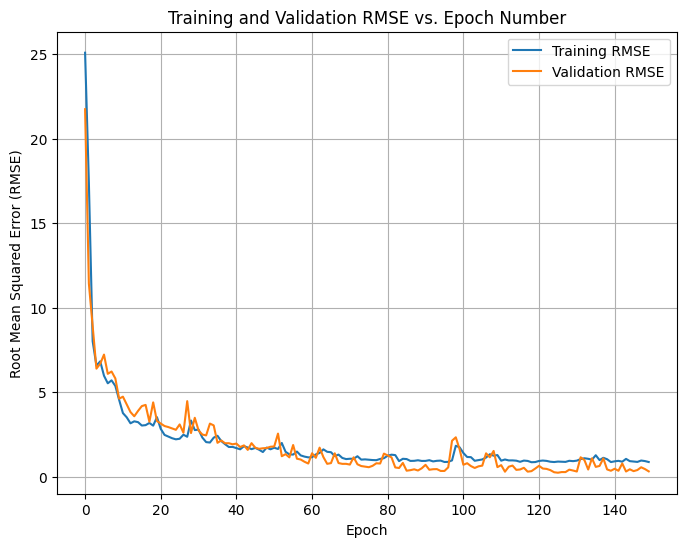

In [24]:
#plotting training and validation RMSE vs. epoch number
plt.figure(figsize=(8, 6))
plt.plot(history.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Training and Validation RMSE vs. Epoch Number')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# taking the INPUT
density = float(input("Enter the density : "))
age = int(input("Enter the age : "))
weight = float(input("Enter the weight : "))
height = float(input("Enter the height : "))
neck = float(input("Enter the neck : "))
chest = float(input("Enter the chest : "))
abdomen = float(input("Enter the abdomen : "))
hip = float(input("Enter the hip : "))
thigh = float(input("Enter the thigh : "))
knee = float(input("Enter the knee : "))
ankle = float(input("Enter the ankle : "))
biceps = float(input("Enter the biceps : "))
forearm = float(input("Enter the forearm : "))
wrist = float(input("Enter the wrist : "))

Enter the density :  10
Enter the age :  20
Enter the weight :  85
Enter the height :  180
Enter the neck :  30
Enter the chest :  38
Enter the abdomen :  34
Enter the hip :  34
Enter the thigh :  26
Enter the knee :  16
Enter the ankle :  10
Enter the biceps :  28
Enter the forearm :  10
Enter the wrist :  6


In [28]:
newValue = pd.DataFrame([[density, age, weight, height, neck, chest, abdomen, hip, thigh, knee, ankle, biceps, forearm, wrist]])
#making the predictions
predictions = model.predict(newValue)

1/1 [==============================] - 0s 11ms/step


In [29]:
predictions[0]

array([3.731031], dtype=float32)